### Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### load data

In [4]:
fraud_df = pd.read_csv(r"C:\Users\Administrator\Downloads\Week 5and6\Improved_detection_of_fraud_cases\data\raw\Fraud_Data.csv")

# Quick overview
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


### Data Cleaning

In [5]:
# Missing values
print(fraud_df.isnull().sum())

# Remove duplicates
fraud_df.drop_duplicates(inplace=True)

# Impute missing values
fraud_df['age'] = fraud_df['age'].fillna(fraud_df['age'].median())
fraud_df['browser'] = fraud_df['browser'].fillna('Unknown')
fraud_df['sex'] = fraud_df['sex'].fillna('U')  # Unknown

# Convert datatypes
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])
fraud_df['ip_address'] = fraud_df['ip_address'].astype(str)
fraud_df['class'] = fraud_df['class'].astype(int)

fraud_df.info()


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  object        
 10  class          

### Exploratory Data Analysis (EDA)

In [6]:
# Numerical features
numerical_features = ['purchase_value', 'age']


### Univariate plots

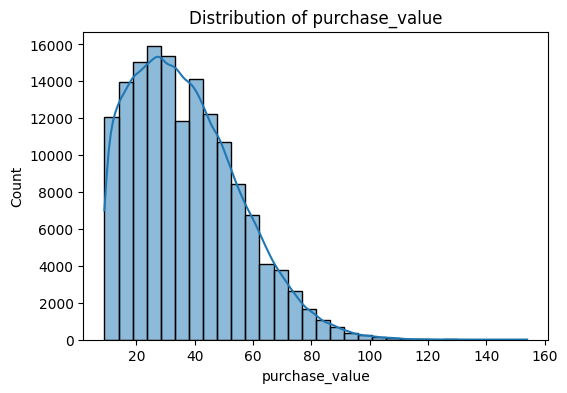

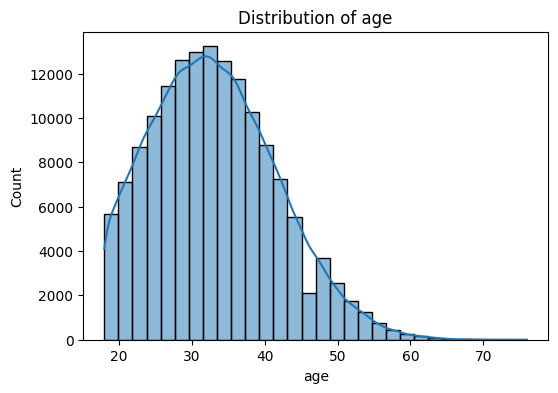

In [7]:
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(fraud_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

### Bivariate analysis: Purchase Value vs Class

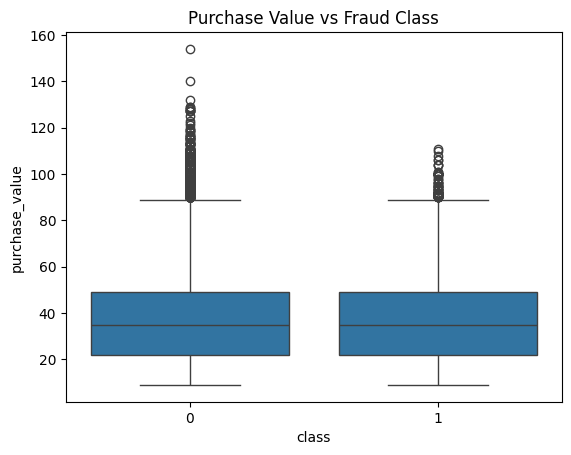

In [8]:
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title('Purchase Value vs Fraud Class')
plt.show()


### Class distribution

class
0    136961
1     14151
Name: count, dtype: int64


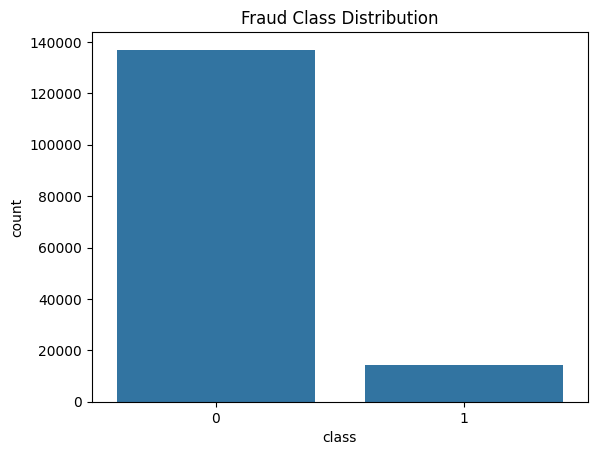

In [9]:
print(fraud_df['class'].value_counts())
sns.countplot(x='class', data=fraud_df)
plt.title('Fraud Class Distribution')
plt.show()

### Geolocation Integration

In [11]:
# Load IP to country data
ip_df = pd.read_csv(r"C:\Users\Administrator\Downloads\Week 5and6\Improved_detection_of_fraud_cases\data\raw\IpAddress_to_Country.csv")

# Function to convert IP to integer
def ip_to_int(ip):
    try:
        parts = ip.split('.')
        return int(parts[0])*256**3 + int(parts[1])*256**2 + int(parts[2])*256 + int(parts[3])
    except:
        return np.nan

# Convert IP addresses in fraud_df to integer
fraud_df['ip_int'] = fraud_df['ip_address'].apply(ip_to_int)

# Use correct column names from IP dataset
ip_df['range_start_int'] = ip_df['lower_bound_ip_address']
ip_df['range_end_int'] = ip_df['upper_bound_ip_address']

# Function to map IP to country using range lookup
def map_country(ip_int):
    row = ip_df[(ip_df['range_start_int'] <= ip_int) & (ip_df['range_end_int'] >= ip_int)]
    if len(row) > 0:
        return row['country'].values[0]
    else:
        return 'Unknown'

# Apply mapping
fraud_df['country'] = fraud_df['ip_int'].apply(map_country)

# Fraud rate by country
fraud_by_country = fraud_df.groupby('country')['class'].mean().sort_values(ascending=False)
print(fraud_by_country)


country
Unknown    0.093646
Name: class, dtype: float64


### save the cleaned data

In [12]:

import os
os.makedirs(r"C:\Users\Administrator\Downloads\Week 5and6\Improved_detection_of_fraud_cases\data\processed", exist_ok=True)

# Save the cleaned and enriched dataset
fraud_df.to_csv(r"C:\Users\Administrator\Downloads\Week 5and6\Improved_detection_of_fraud_cases\data\processed\fraud_cleaned.csv", index=False)

print("Cleaned data saved to data/processed/fraud_cleaned.csv")


Cleaned data saved to data/processed/fraud_cleaned.csv
